# Homework 2: Simple linear regression using TensorFlow in Python  <br>
*Course: Artificial Intelligence II* <br>
*Universidad de Monterrey* <br>
*Student: Jorge Rodrigo Gómez Mayo - 612473* <br>
*Ing. en Tecnologías Electrónica y Robótica* <br> 
*Lecturer: Dr Andrés Hernández Gutiérrez* <br>
*Friday 30 August 2024, San Pedro Garza García, N.L.* <br>
***

### Importar bibliotecas estándar
En esta celda, importamos las bibliotecas necesarias para nuestro análisis: <br>
* **NumPy** (`numpy`): se utiliza para crear vectores y realizar operaciones matemáticas. Documentación: https://numpy.org/doc/stable/
* **Pandas** (`pandas`): se utiliza para la manipulación y el análisis de datos estructurados. Documentación: https://pandas.pydata.org/pandas-docs/stable/
* **TensorFlow** (`tensorflow`): se utiliza para diseñar, entrenar, validar y probar modelos de redes neuronales. Documentación: https://www.tensorflow.org/learn
* **Matplotlib** (`matplotlib.pyplot`): se utiliza para crear gráficos y visualizar datos. Documentación: https://matplotlib.org/stable/users/index.html
* **Scikit-Learn** (`sklearn.model_selection`): esta biblioteca proporciona la función train_test_split para dividir el conjunto de datos inicial en conjuntos de entrenamiento y validación. Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

***
### Función para generar datos sintéticos
Esta celda define una función `generate_data()` que genera un conjunto de datos sintéticos para un modelo de regresión lineal simple. <br>
La función utiliza un conjunto de coeficientes predeterminados (`true_coeffs`) para determinar la intersección y la pendiente de la línea de regresión.
También añade un ruido aleatorio con una desviación estándar específica (`noise_std`), simulado como una distribución normal, para hacer que los datos se parezcan más a un escenario del mundo real. <br>
Más información sobre los datos sintéticos y su generación:
* https://aws.amazon.com/es/what-is/synthetic-data/
* https://www.leewayhertz.com/what-is-synthetic-data/#How-to-evaluate-synthetic-data-quality

In [2]:
def generate_data(true_coeffs=np.array([10, 1]), noise_std=2, num_samples=100):
    # Seed for reproducibility
    np.random.seed(4500)

    # Generate synthetic data
    x = np.arange(0,100, 1)
    y = true_coeffs[0] + true_coeffs[1]*x + np.random.normal(loc=0.0, scale=noise_std, size=num_samples)

    # Return features and response
    return (x, y)

***
### Generar el conjunto de datos sintéticos
En esta celda, generamos un conjunto de datos sintéticos utilizando la función `generate_data()` con una intersección de 10, una pendiente de 1, y una desviación estándar del ruido de 5. Estos datos serán utilizados para entrenar y evaluar nuestro modelo de regresión lineal. <br>
Para más información sobre la regresión lineal: https://www.statisticssolutions.com/what-is-linear-regression/

In [3]:
# Generate a synthetic dataset for simple linear regression
true_coeffs = np.array([10, 1])
noise_std = 5
x, y = generate_data(true_coeffs=true_coeffs, noise_std=noise_std, num_samples=100)

***
### Visualizar el conjunto de datos sintéticos generado
En esta celda, visualizamos el conjunto de datos sintéticos utilizando un gráfico de dispersión. Esta visualización permite observar cómo se distribuyen los datos en relación con la variable independiente (`x`) y dependiente (`y`), y proporciona una vista previa de la relación lineal esperada. <br>
Documentación de la función para crear gráficos de dispersión en Matplotlib: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

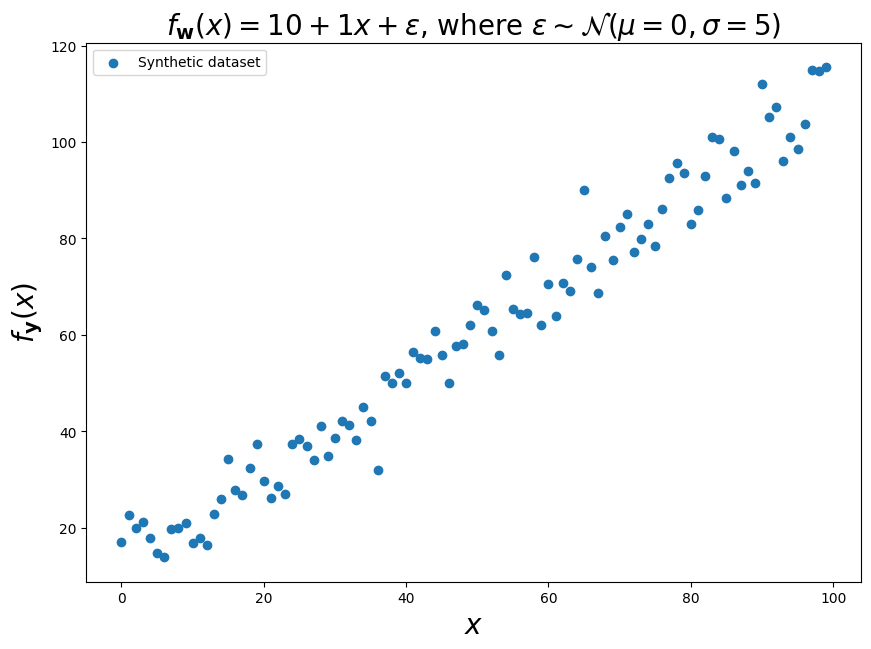

In [4]:
# Visualise the generated synthetic dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Synthetic dataset')
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("$f_{\mathbf{y}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$",
            fontsize=20)
plt.legend()
plt.show()

***
### Dividir los datos en conjuntos de entrenamiento y prueba
En esta celda, utilizamos la función `train_test_split()` de Scikit-Learn para dividir nuestros datos sintéticos en dos conjuntos: uno para entrenamiento (80%) y otro para prueba (20%). Esto nos permitirá entrenar el modelo con un conjunto de datos y validarlo con un conjunto diferente para evaluar su desempeño. <br>
Más sobre como funciona la división de datos para entrenamiento y prueba: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#train-test-split

In [5]:
# Split the data into training and testing sets using train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

***
### Visualizar la división de datos de entrenamiento y prueba
Aquí, visualizamos cómo se dividen los datos en conjuntos de entrenamiento y prueba. Esto es importante para asegurar que el modelo esté expuesto a diferentes datos durante el entrenamiento y la validación.

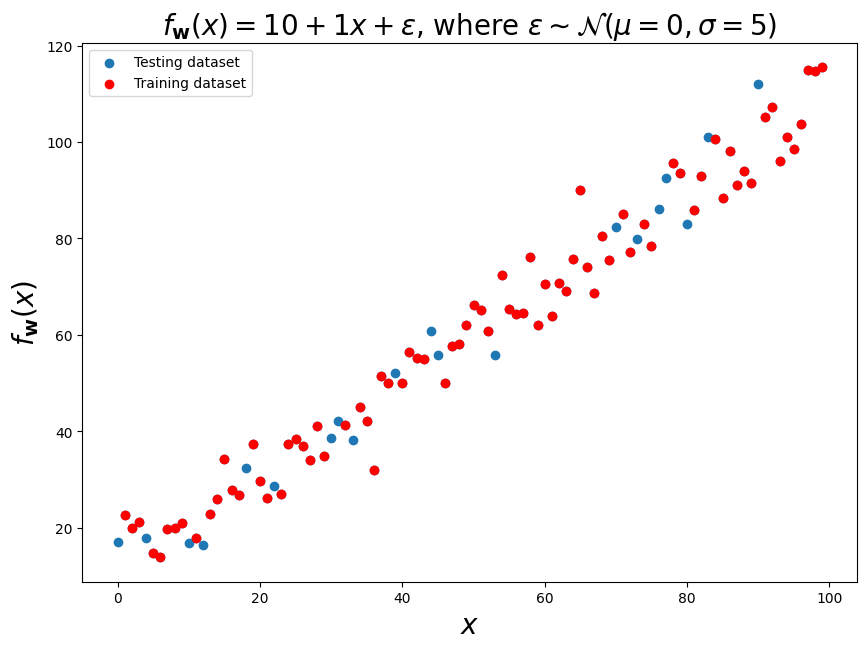

In [6]:
# Visualise the generated synthetic dataset
plt.figure(figsize=(10,7))
plt.scatter(x, y, label='Testing dataset')
plt.scatter(x_train, y_train, label='Training dataset', color=[1,0,0])
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel(r"$f_{\mathbf{w}}(x)$", fontsize=20)
plt.title(rf"$f_{{\mathbf{{w}}}}(x) = {true_coeffs[0]} + {true_coeffs[1]} x + \epsilon$, where $\epsilon \sim \mathcal{{N}}(\mu=0, \sigma={noise_std})$", 
            fontsize=20)
plt.legend()
plt.show()

***
### Construir el modelo de regresión lineal
En esta celda, creamos un modelo de regresión lineal simple utilizando TensorFlow con una sola neurona. Luego, compilamos el modelo con el optimizador `'adam'` y la función de pérdida de error cuadrático medio (MSE). <br>
Más sobre el uso de TensorFlow para construir modelos: https://www.tensorflow.org/guide/keras/sequential_model

In [7]:
# Build the linear regression model using a multiple-input single neuron
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

***
### Mostrar resumen del modelo
Esta celda muestra un resumen de la arquitectura del modelo de regresión lineal creado en TensorFlow. El resumen incluye información como el número de capas, los parámetros de cada capa, y el total de parámetros entrenables. Esto es útil para entender la estructura del modelo y verificar que se haya construido correctamente. <br>
Para más información sobre cómo interpretar el resumen de un modelo en TensorFlow se puede leer la siguiente documentación: https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


***
### Entrenar y evaluar el modelo
En esta celda, entrenamos el modelo de regresión lineal utilizando el conjunto de datos de entrenamiento. El modelo es entrenado durante 500 épocas con un tamaño de lote de 10, utilizando un 10% de los datos de entrenamiento para la validación. Posteriormente, el modelo es evaluado utilizando los datos de prueba para calcular la pérdida (error cuadrático medio). <br>
Para aprender más sobre cómo funciona el entrenamiento de modelos en TensorFlow, se puede leer la siguiente guía: https://www.tensorflow.org/guide/keras/training_with_built_in_methods

In [9]:
# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=10, validation_split=0.10, verbose=1)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f"\nTest Loss: {loss}")

Epoch 1/500
8/8 [==============================] - 1s 27ms/step - loss: 12055.0205 - val_loss: 16005.5742
Epoch 2/500
8/8 [==============================] - 0s 16ms/step - loss: 11962.3428 - val_loss: 15879.6094
Epoch 3/500
8/8 [==============================] - 0s 12ms/step - loss: 11864.4766 - val_loss: 15757.1553
Epoch 4/500
8/8 [==============================] - 0s 12ms/step - loss: 11769.8955 - val_loss: 15630.7637
Epoch 5/500
8/8 [==============================] - 0s 12ms/step - loss: 11675.8262 - val_loss: 15503.3096
Epoch 6/500
8/8 [==============================] - 0s 11ms/step - loss: 11578.3662 - val_loss: 15372.6699
Epoch 7/500
8/8 [==============================] - 0s 12ms/step - loss: 11477.4014 - val_loss: 15246.1055
Epoch 8/500
8/8 [==============================] - 0s 12ms/step - loss: 11383.3936 - val_loss: 15116.9902
Epoch 9/500
8/8 [==============================] - 0s 11ms/step - loss: 11285.5029 - val_loss: 14989.5898
Epoch 10/500
8/8 [============================

***
### Imprimir los pesos del modelo entrenado
En esta celda, imprimimos los pesos (`w1`) y los sesgos (`w0`) aprendidos por el modelo durante el entrenamiento. Estos valores son los coeficientes de la regresión lineal que el modelo ha ajustado para minimizar el error en las predicciones. <br>
Para más detalles sobre cómo estos pesos/sesgos afectan al modelo de TensorFlow, se puede leer esta parte de la documentación: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [10]:
# Print the weights of the trained model
weights = model.layers[0].get_weights()
print(f"Weights [w1]: {weights[0]}")
print(f"Biases [w0]: {weights[1]}")

Weights [w1]: [[1.1018136]]
Biases [w0]: [2.0858927]


***
### Hacer predicciones con el modelo entrenado
Aquí, utilizamos el modelo entrenado para hacer predicciones sobre los datos de prueba (`x_test`) y los datos de entrenamiento (`x_train`). Las predicciones se almacenan en `y_pred` y `y_pred_train`, respectivamente. Este paso nos permite comparar las predicciones del modelo con los valores reales y evaluar su precisión. <br>
Para más información sobre cómo hacer predicciones con un modelo de TensorFlow, se puede checar este tutorial: https://www.tensorflow.org/tutorials/keras/regression#make_predictions

In [11]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

3/3 [==============================] - 0s 3ms/step


***
### Graficar los resultados
Finalmente, en esta celda, graficamos los datos de entrenamiento junto con la línea ajustada por el modelo de regresión lineal. La gráfica muestra cómo el modelo predice la relación lineal entre `x` e `y`, visualizando tanto los datos originales como la curva ajustada. Esta visualización es crucial para entender que tan bien el modelo ha capturado la tendencia de los datos. <br>
En esta liga se pueden explorar alternativas para mostrar el fit de los modelos usando seaborn: https://seaborn.pydata.org/tutorial/regression.html

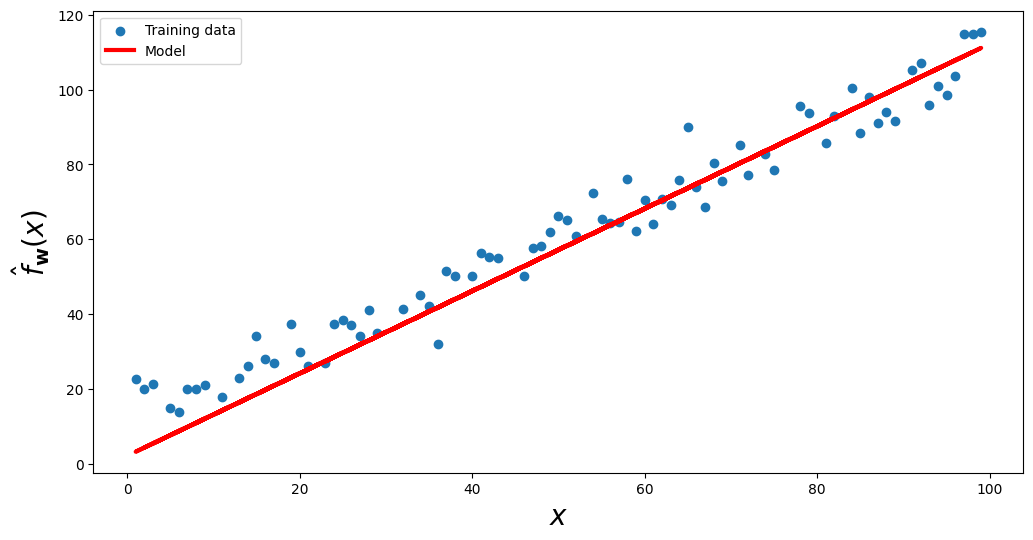

In [12]:
# Plot the results
plt.figure(figsize=(12, 6))

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_pred_train, label='Model', linewidth=3, color=[1,0,0])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\hat{f}_{\mathbf{w}}(x)$', fontsize=20)
plt.legend()
plt.show()

***
## Conclusiones
Al realizar esta tarea, tuve la oportunidad de refrescar varios conceptos vistos en el curso de Inteligencia Artificial I, que cursé el semestre pasado. Aunque la mayoría de los temas aún los recordaba bien, el tener que pensar en el propósito de cada celda de código (aunque lo revisamos en clase) me retó a profundizar en la comprensión de ciertas funciones, la configuración de parámetros específicos y la interpretación de los resultados generados por el modelo.

Este ejercicio también me permitió comprender mejor la importancia de elegir adecuadamente los parámetros del modelo, como el número de épocas de entrenamiento. Como discutimos en clase, usar un número demasiado bajo de épocas puede hacer que el modelo no aprenda lo suficiente, pero aumentar excesivamente este número no siempre mejora el rendimiento y puede llevar a un sobreajuste. Este equilibrio es fundamental para obtener modelos eficientes y precisos.

Asimismo, pude ver la importancia de hacer los experimentos replicables, lo cual es esencial para que otras personas puedan reproducir los resultados y validar su precisión. La replicabilidad es especialmente útil en un entorno académico y profesional, facilitando la colaboración y el aprendizaje.

Finalmente, la tarea me ayudó a tener una mejor idea del tiempo que se necesita para entrenar modelos, lo cual es importante para planificar futuros proyectos. Usar herramientas como DirectML, que permite aprovechar mejor los recursos de hardware disponibles, puede hacer una gran diferencia en términos de eficiencia.

En general, esta tarea me ayudó a reforzar mis conocimientos, entender mejor la importancia de los parámetros adecuados y estar más preparado para enfrentar futuros desafíos en el curso.

***
## Firma de Honor: <br>
#### *"Doy mi palabra de que he realizado esta actividad con Integridad Académica".*
***
## Referencias
[1] NumPy, "NumPy Documentation," [Online]. Available: https://numpy.org/doc/stable/. [Accessed: 30-Aug-2024].

[2] Pandas, "Pandas Documentation," [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/. [Accessed: 30-Aug-2024].

[3] TensorFlow, "TensorFlow Learning," [Online]. Available: https://www.tensorflow.org/learn. [Accessed: 30-Aug-2024].

[4] Matplotlib, "User's Guide," [Online]. Available: https://matplotlib.org/stable/users/index.html. [Accessed: 30-Aug-2024].

[5] Scikit-Learn, "train_test_split Documentation," [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html. [Accessed: 30-Aug-2024].

[6] Amazon Web Services, "What is Synthetic Data?," [Online]. Available: https://aws.amazon.com/es/what-is/synthetic-data/. [Accessed: 30-Aug-2024].

[7] LeewayHertz, "How to Evaluate Synthetic Data Quality," [Online]. Available: https://www.leewayhertz.com/what-is-synthetic-data/#How-to-evaluate-synthetic-data-quality. [Accessed: 30-Aug-2024].

[8] Statistics Solutions, "What is Linear Regression?," [Online]. Available: https://www.statisticssolutions.com/what-is-linear-regression/. [Accessed: 30-Aug-2024].

[9] Matplotlib, "scatter Documentation," [Online]. Available: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter. [Accessed: 30-Aug-2024].

[10] TensorFlow, "Sequential Model Guide," [Online]. Available: https://www.tensorflow.org/guide/keras/sequential_model. [Accessed: 30-Aug-2024].

[11] TensorFlow, "Model Summary Documentation," [Online]. Available: https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary. [Accessed: 30-Aug-2024].

[12] TensorFlow, "Training with Built-In Methods Guide," [Online]. Available: https://www.tensorflow.org/guide/keras/training_with_built_in_methods. [Accessed: 30-Aug-2024].

[13] TensorFlow, "Dense Layer Documentation," [Online]. Available: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense. [Accessed: 30-Aug-2024].

[14] TensorFlow, "Regression Tutorial - Make Predictions," [Online]. Available: https://www.tensorflow.org/tutorials/keras/regression#make_predictions. [Accessed: 30-Aug-2024].

[15] Seaborn, "Regression Tutorial," [Online]. Available: https://seaborn.pydata.org/tutorial/regression.html. [Accessed: 30-Aug-2024].

[16] StatQuest with Josh Starmer, "StatQuest: Linear Regression," YouTube, 16-Aug-2018. [Online]. Available: https://www.youtube.com/watch?v=CtsRRUddV2s. [Accessed: 30-Aug-2024].

[17] Microsoft, "DirectML TensorFlow Plugin: Minimum and Maximum System Requirements," [Online]. Available: https://learn.microsoft.com/es-es/windows/ai/directml/gpu-tensorflow-plugin#step-1-minimum-and-maximum-system-requirements. [Accessed: 30-Aug-2024].